In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.constants as constants

#import sympy as sp
#from IPython.display import HTML, display, Math, Latex

#plt.style.use('dark_background')
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (15.0, 9.0)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['font.size'] = 16
%matplotlib inline

def tabelle_darstellen(data):
    """Eine Funktion, die Tabellen und Arrays schön darstellt"""
    display(HTML(
        '<table><tr>{}</tr></table>'.format(
            '</tr><tr>'.join(
                '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
            )
     ))

def Fehlerfunktionsgenerator(funktion, variablen, name_funktion, name_ableitung):
    """Eine Funktion, die automatisch die Fehlerformel generiert
    orientiert bei https://www.physi.uni-heidelberg.de/Einrichtungen/AP/python/Fehlerrechnung.html
    """
    fehler = 0
    fehlersymbole=[]
    ableitungen_quadr = []

    for var in variablen:
        d = sp.symbols('d' + var.name)        #Symbole fuer die Fehler generieren
        fehlersymbole.append(d)               #Fehlersymbole in Liste eintragen
        partial = sp.diff(funktion, var) * d  #Partielle Differentation und mit mit Fehlersymbol 'd' multiplizieren
        ableitungen_quadr.append(partial**2)  
        fehler = fehler + partial**2

    fehler_abs=sp.sqrt(fehler)              #Latex Format fuer den absoluten Fehler
    fehler_abs_vereinfacht=sp.simplify(sp.sqrt(fehler))              #Latex Format fuer den absoluten Fehler
    
    print('Funktion: ', name_funktion,)
    display(Math("="+sp.latex(funktion)))
    print('Absoluter Fehler:', name_ableitung," = Δ", name_funktion)
    display(Math("="+sp.latex(fehler_abs).replace('d',r'\Delta ') +'='+sp.latex(fehler_abs_vereinfacht).replace('d',r'\Delta ')))   #Formel absoluter Fehler
    return fehler_abs_vereinfacht

def variablenname_zu_string(variable, lokale_variablen = locals()):
    """"Funktion um den Namen im Code einer Codevariabel als String zu erhalten"""
    for k, v in list(lokale_variablen.items()):
        if v is variable:
            return k

# Aufgabe 10.1 Scattering angle
$χ (b) = π - 2 ∫^∞_r + bdr r 2 √ 1 - b 2 / r 2 - V (r) / E$

In [4]:
χ_b = lambda b,E,r_0: np.pi - 2 * integrate.quad(
    lambda r: b/(r**2 * np.sqrt(1-b**2/r**2-V(r)/E)),
    r_0, np.inf)[0]
χ_b1 = lambda b,E,r_0: np.pi - 2 * integrate.quad(
    lambda r: b/(r**2 * np.sqrt(1-b**2/r**2-1/r**2/E)),
    r_0, np.inf)[0]
χ_b2 = lambda b,E,r_0: np.pi - 2 * integrate.quad(
    lambda r: b/(r**2 * np.sqrt(1-b**2/r**2-1e-10/E)),
    r_0, np.inf)[0]

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
/usr/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


'V = lambda r: r**-12-2*r**-6\nfor b in b_liste:\n    plt.plot(b/r_0, χ_b(b, E, r_0)/np.pi+0.3,"x", c="C3")'

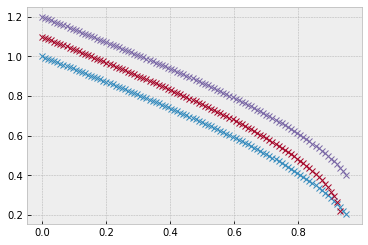

In [7]:
b_liste = np.linspace(0,1.9,100)
E = 2
r_0 = 2

V = lambda r: 1e-10
for b in b_liste:
    plt.plot(b/r_0, χ_b(b, E, r_0)/np.pi,"x", c="C0")

V = lambda r: 1/r**2
for b in b_liste:
    plt.plot(b/r_0, χ_b1(b, E, r_0)/np.pi+0.1,"x", c="C1")
    
V = lambda r: -np.exp(-r)
for b in b_liste:
    plt.plot(b/r_0, χ_b2(b, E, r_0)/np.pi+0.2,"x", c="C2")

"""V = lambda r: r**-12-2*r**-6
for b in b_liste:
    plt.plot(b/r_0, χ_b(b, E, r_0)/np.pi+0.3,"x", c="C3")"""

In [6]:
down = lambda r: 1/(r**2 * np.sqrt(1-b**2/r**2-V/E))

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


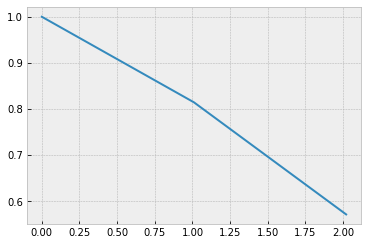

In [72]:
E = -0.1
b = 1
V = 1
r = np.linspace(100,0,100)
#plt.plot(r, down(r))
plt.plot(r, np.sqrt(1-r/3))

## Aufgabe 10.2
$$F = ma$$
$$F = -\Delta V(r)$$

$$a = \ddot r = - \Delta V(r)/m$$
$$r = ∫∫-Delta V(r)/m$$

$$V(r) =  \frac{1}{r^{12}} - 2\frac{1}{r^6}$$
$$\Delta V(r) =  \frac{12(r^6-1)}{r^{13}} $$

In [ ]:
V = lambda r: 1/r**12 - 2*1/r**6
dV = lambda r: (12 (r^6-1))/r^13
